---
# PfDA Project 2
---

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

---
# **Introduction**
---

This project aims to delve into a comprehensive examination of climate data across an extensive timeline, ranging from 800,000 years ago to the present day. The analysis primarily focuses on establishing correlations between CO2 levels and temperature anomalies while also exploring changes in polar ice coverage as a key variable. This research also seeks to investigate climate change signals within the context of Ireland's meteorological observations and harnesses data fusion techniques to amalgamate multiple datasets into a structured pandas dataframe.

## Project Overview
This project involves an intricate series of steps, encompassing data collection from reputable sources, integration of diverse datasets into a coherent framework, exploratory data analysis to uncover trends and relationships, and predictive modeling techniques to forecast future global temperature anomalies. Additionally, the study entails the comparison of these predictions with established climate models, intending to shed light on potential accelerated warming trends observed in recent climate features.

## Objectives and Goals
The primary objective of this research is to perform an in-depth analysis of climate data, investigating the relationship between CO2 levels and temperature anomalies while exploring related variables. The specific goals include the examination of Irish climate change signals, prediction of future global temperature anomalies, and the comparison of these predictions with established climate models.

## Scope and Limitations
The scope of this study encompasses the analysis of climate data spanning an extensive timeframe, incorporating various datasets to establish correlations and predict future temperature anomalies. However, certain limitations exist, including the potential constraints in data availability or accuracy, complexities in predictive modeling, and the inherent uncertainties associated with long-term climate predictions.

## Scales of Measurement

`ppmv` = Parts per millions by volume
`mm` = Millimetres
`gigaton` = 1,000,000,000 tonnes

---
# Extraction
---

## Temperature

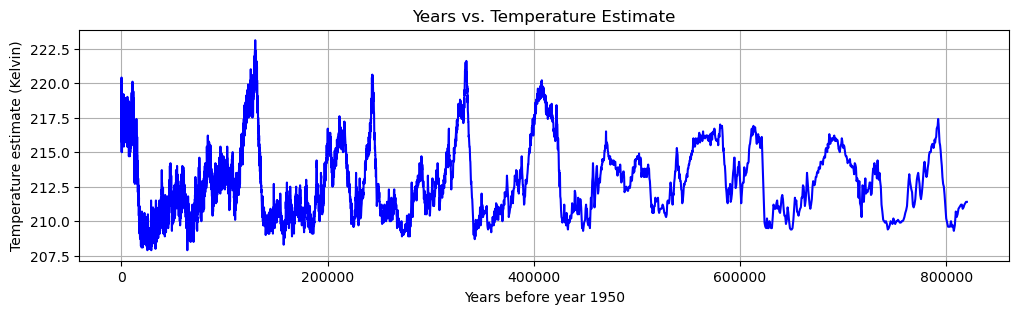

In [2]:
file_path1 = './data/temp/epicaDC.deuttemp.EDC3-AICC.csv'
df1 = pd.read_csv(file_path1)

# Extracting columns 3 (EDC3 age scale) and 5 (Temperature estimate)
edc3_age = df1['EDC3béta']
temperature_estimate = df1['temp']

# Plotting the data
plt.figure(figsize=(12, 3))
plt.plot(edc3_age, temperature_estimate, color='blue')
plt.xlabel('Years before year 1950')
plt.ylabel('Temperature estimate (Kelvin)')
plt.title('Years vs. Temperature Estimate')
plt.grid(True)
plt.show()

## CO2

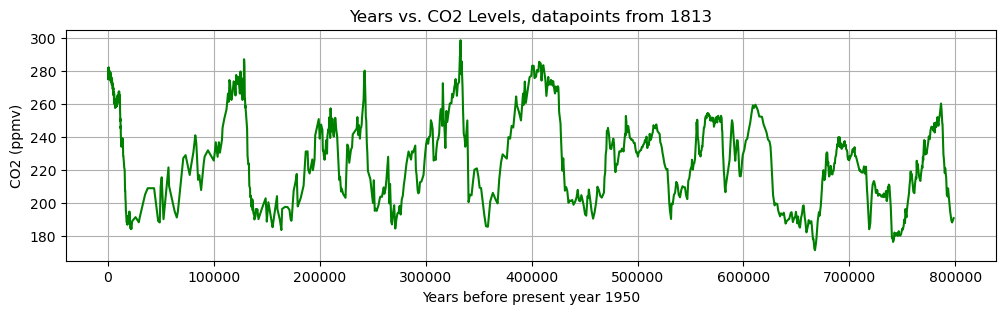

In [3]:
file_path2 = './data/co2/41586_2008_BFnature06949_MOESM31_ESM.xlsx'
df2 = pd.read_excel(file_path2, skiprows=6, sheet_name='3.  Composite CO2')

# Handling NaN values (if any)
df2.dropna(subset=['EDC3_gas_a (yr)', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
years = df2['EDC3_gas_a (yr)']
co2 = df2['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(12, 3))
plt.plot(years, co2, color='green')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, datapoints from 1813')
plt.grid(True)
plt.show()

The above data has the first data point in years as being 137 years Before Present(BP), with BP being 1950. In the below data, the year values in the first column commence at -51 years BP, which would put the year as 2001.

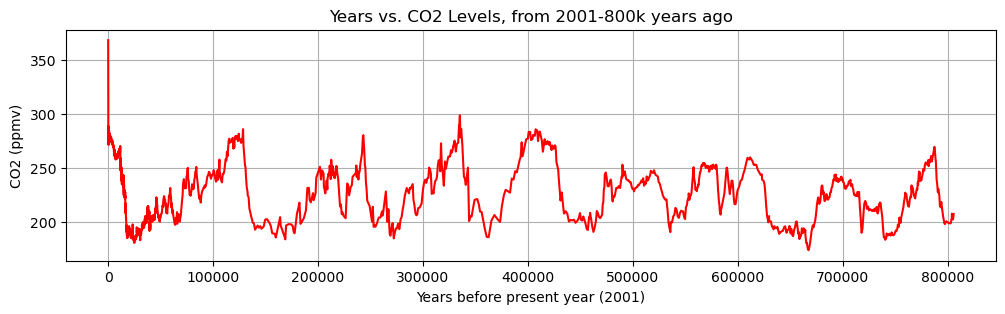

In [4]:
file_path3 = './data/co2/grl52461-sup-0003-supplementary.xlsx'
df3 = pd.read_excel(file_path3, skiprows=14, sheet_name='CO2 Composite')

# Handling NaN values (if any)
df3.dropna(subset=['Gasage (yr BP) ', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
Gasage = df3['Gasage (yr BP) ']
co22 = df3['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(12, 3))
plt.plot(Gasage, co22, color='red')
plt.xlabel('Years before present year (2001)')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, from 2001-800k years ago')
plt.grid(True)
plt.show()

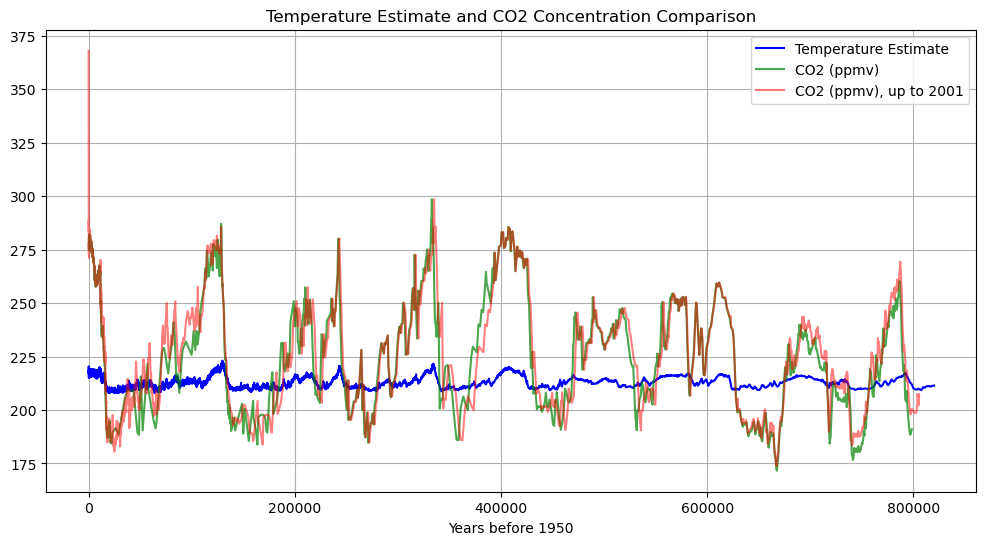

In [5]:
# Plotting both sets of data on the same graph
plt.figure(figsize=(12, 6))

# Plotting the first dataset
plt.plot(edc3_age, temperature_estimate, linestyle='-', color='blue', label='Temperature Estimate')

# Plotting the second dataset
plt.plot(years, co2, linestyle='-', color='green', label='CO2 (ppmv)', alpha=0.7)

# Plotting the third dataset
plt.plot(Gasage, co22,  linestyle='-', color='red', label='CO2 (ppmv), up to 2001', alpha=0.5)

plt.xlabel('Years before 1950')
plt.grid(True)
plt.legend()
plt.title('Temperature Estimate and CO2 Concentration Comparison')
plt.show()

- It's interesting to observe the subtle correlations between CO2 levels and temperature changes throughout history. By analysing the graph, we can see how fluctuations in CO2 levels have impacted temperature over time, providing valuable insights into the Earth's climate dynamics.
- We can also see the CO2 levels followed a predictable pattern throughout the history of the data, until they reached a lower point around 2000 years ago, possibly this could be due to the decline of the Roman Empire, and the reduced industrial activity, as we know they had effect on [methane](https://www.smithsonianmag.com/history/air-pollution-has-been-a-problem-since-the-days-of-ancient-rome-3950678/#:~:text=%E2%80%9CThe%20ice%20core%20data%20show,entire%20atmosphere%2C%E2%80%9D%20Sapart%20says).
- After this point, there is a notable surge around 1950, this trend is indicative of a significant anthropogenic impact on atmospheric CO2 concentrations, reflecting the influence of industrialisation and human activities on the environment.

## Ice

The simulated ice data was gathered from the [NOAA](https://www.ncei.noaa.gov/access/paleo-search/) website.
A search entered as below will yield the original data set.
> Global 5 Million Year Sea Level, Temperature, and d18Osw Reconstructions
https://www.ncei.noaa.gov/pub/data/paleo/reconstructions/deboer2014/deboer2014.txt

In [6]:
# Read the text file with tab-separated values and replace -999 with NaN
file_path_txt = './data/ice/deboer2014.txt'
df = pd.read_csv(file_path_txt, delimiter='\t', na_values=-999, skiprows=114)

# Save the DataFrame to a CSV file
file_path_csv = './data/ice/generated/deboer_icedata.csv'
df.to_csv(file_path_csv, index=False)

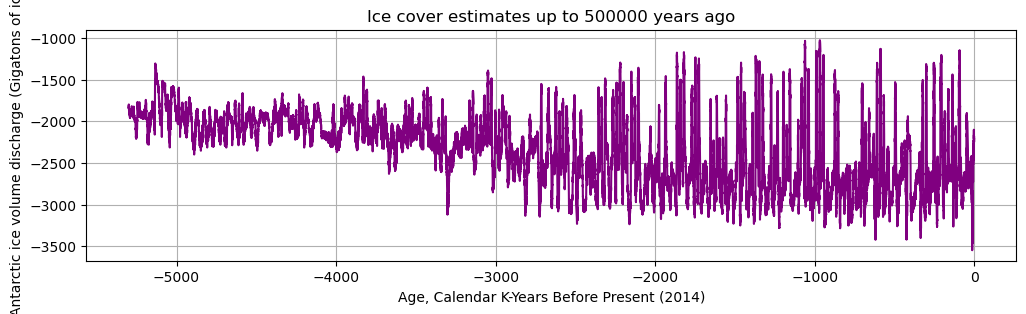

In [7]:
# Read the CSV file into a Pandas DataFrame
df_ice = pd.read_csv('./data/ice/generated/deboer_icedata.csv')

# Extract data from the first column and 'AnIS-V' column
year = df_ice['age_calkaBP']
ice_volume = df_ice['AnIS-ID']
#temp_anom = df_ice['tempanomNH']
# Plotting the extracted data
plt.figure(figsize=(12, 3))
plt.plot(year, ice_volume, linestyle=('-'), color='purple')
plt.xlabel('Age, Calendar K-Years Before Present (2014)')  
plt.ylabel('Antarctic ice volume discharge (Gigatons of ice))')  
plt.title('Ice cover estimates up to 500000 years ago')
plt.grid(True)
plt.show()


In [8]:
# plt.figure(figsize=(8, 6))
# plt.scatter(year, temp_anom, color='purple')
# plt.xlabel('Age, Calendar K-Years Before Present (2014)')  
# plt.ylabel('Temperature Anomaly (°C)')  
# plt.title('Temperature Anomaly up to 50000 years ago')
# plt.grid(True)
# plt.show()

## Ireland

Irish rainfall data from 1711 - 2016 gathered from MET [Éireann](https://www.met.ie/climate/available-data/long-term-data-sets/#MonthlyIIP), understanding gathered from this journal [article](https://cp.copernicus.org/articles/14/413/2018/) from Maynooth University.

This data shows the median monthly rainfall data for each month from the year 1711 - 2016. The data is a composite of many different data points taken from different weather stations throughout the given time period.

In [9]:
rain = pd.read_csv('./data/ireland/IOI_1711_SERIES.CSV')

#print(rain.head())

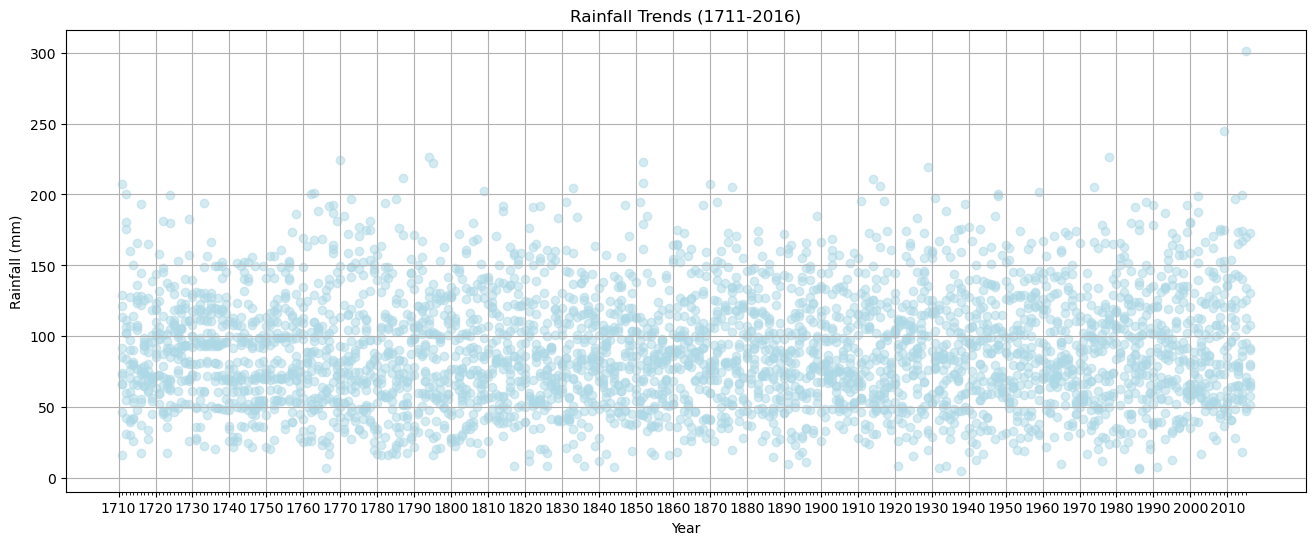

In [10]:
# Create a figure and axis
plt.figure(figsize=(16, 6))
ax = plt.gca()

# Plotting the data as individual points
plt.scatter(rain['Year'], rain['Median montly series'], color='lightblue', alpha=0.5)

# Set x-axis major ticks every 10 years
major_ticks = range(1710, 2017, 10)
ax.set_xticks(major_ticks)

# Set minor ticks between major ticks
minor_ticks = range(1711, 2016, 1)
ax.set_xticks(minor_ticks, minor=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trends (1711-2016)')

# Show grid and plot
plt.grid(True)
plt.show()

In [11]:
# iretemp = pd.read_csv('./data/ireland/LongTermTemperatures_1900-2022_annual.csv')

# plt.plot(iretemp['year'], iretemp['Annual'], color='blue')
# plt.xlabel('Year')
# plt.ylabel('Temperature (Degrees Celsius)')
# plt.title('Temperature Trends (1900-2022)')

# plt.grid(True)
# plt.show

---
# Transformations
---

## Rain

Creating an average monthly rainfall from the rainfall data

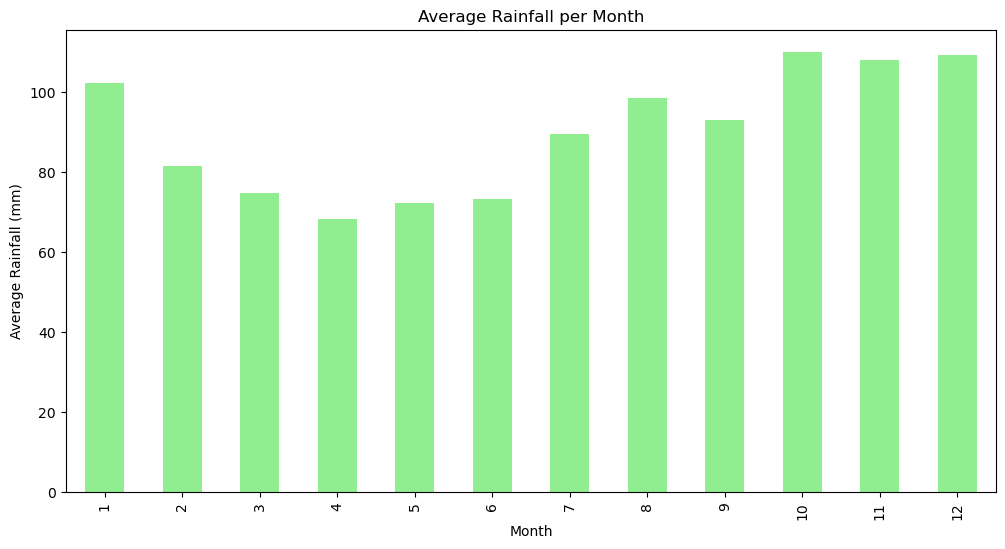

In [12]:
# Aggregating rainfall for each month
monthly_rainfall = rain.groupby('Month')['Median montly series'].mean()

# Plotting a bar plot for monthly rainfall
plt.figure(figsize=(12, 6))
monthly_rainfall.plot(kind='bar', color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall per Month')
plt.show()

In [13]:
# # Calculate yearly median rainfall values
yearly_rainfall = rain.groupby('Year')['Median montly series'].median().reset_index()

# Display the first and last rows of the yearly rainfall data
#print(yearly_rainfall.head())

#print(yearly_rainfall.tail())

### Aggregating timeseries data to examine the rainfall data

By aggregating the data, it becomes possible to observe the broader trend of rainfall over the span of the entire dataset.

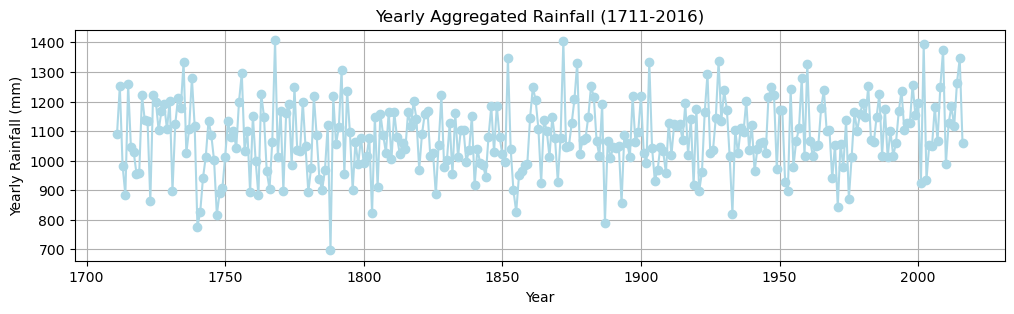

In [14]:
# Convert 'Year' and 'Month' columns to datetime
rain['Date'] = pd.to_datetime(rain[['Year', 'Month']].assign(day=1))

# Group by year and sum the rainfall for each year
yearly_rainfall = rain.groupby(rain['Date'].dt.year)['Median montly series'].sum()

# Plot the aggregated yearly rainfall data
plt.figure(figsize=(12, 3))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o', linestyle='-', color='lightblue')
plt.xlabel('Year')
plt.ylabel('Yearly Rainfall (mm)')
plt.title('Yearly Aggregated Rainfall (1711-2016)')
plt.grid(True)
plt.show()

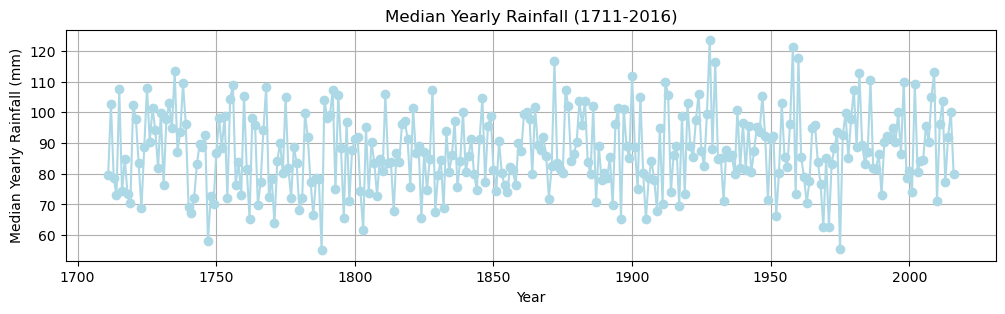

In [15]:
# Convert 'Year' and 'Month' columns to datetime
rain['Date'] = pd.to_datetime(rain[['Year', 'Month']].assign(day=1))

# Calculate median yearly rainfall
yearly_median_rainfall = rain.groupby(rain['Date'].dt.year)['Median montly series'].median()

# Plot the median yearly rainfall data
plt.figure(figsize=(12, 3))
plt.plot(yearly_median_rainfall.index, yearly_median_rainfall.values, marker='o', linestyle='-', color='lightblue')
plt.xlabel('Year')
plt.ylabel('Median Yearly Rainfall (mm)')
plt.title('Median Yearly Rainfall (1711-2016)')
plt.grid(True)
plt.show()


Creating a yearly rainfall dataset

In [16]:
yearly_rainfall_dataset = yearly_rainfall.reset_index()
yearly_rainfall_dataset.columns = ['Year', 'Rainfall']

# write to a new csv file
yearly_rainfall_dataset.to_csv('./data/ireland/generated/yearly_totalrainfall.csv', index=False)

In [17]:
yearly_median_rainfall_dataset = yearly_median_rainfall.reset_index()
yearly_median_rainfall_dataset.columns = ['Year', 'Median rainfall']

# write to a new csv file
yearly_median_rainfall_dataset.to_csv('./data/ireland/generated/yearly_medianrainfall.csv', index=False)

## Reducing for Irish Data

Before aligning the datasets, they must be transformed to be represented on the same time scale.
To do this, we will need to change the co2 and temp data to only include values between 1711-2016, but on their timescale.

For the CO2 data, the latest year is 2001, which reads as -51 from the data format in the file. To compare it with the Irish data, it needs to be reduced down to the same range.

In [18]:
new_co2 = df3.copy()
# calculate the actual calendar year based on the difference from the reference year
reference_year = 1950

# Transform the 'Gasage (yr BP)' column to actual calendar years
new_co2['Year'] = reference_year - new_co2['Gasage (yr BP) ']

#print(new_co2)

In [19]:
# Get data from -51 years before present up to the final desired value
end_value = 1711  # Value to end on

# Filter the DataFrame based on the condition where 'Actual Year' reaches or exceeds the specified value
filtered_co2 = new_co2[new_co2['Year'] >= end_value]
#print(filtered_co2)

In [20]:
new_temp = df1.copy()
# calculate the actual calendar year based on the difference from the reference year
reference_year = 1950

# Transform the reference column to actual calendar years
new_temp['Year'] = reference_year - new_temp['EDC3béta']

#print(new_temp.head())

In [21]:
end_value = 1711.00  # Value to end on
filtered_temp = new_temp[new_temp['Year'] >= end_value]

#print(filtered_temp)
filtered_temp.to_csv('./data/temp/generated/filtered_temp.csv', index=False)

## Reducing for Ice Data

Below there is transformations applied to Ice, CO2 and Temperature so they can be compared on the same time scale.
The limit on the most recent time is the year 2000 from the temperature dataset. The furthest back limit is the year 52986, taken from the Ice Data

In [22]:
filtered_ice = df_ice.copy()

# Set the reference year to 1950 by adjusting the value representing the present (2014) to 1950
filtered_ice['Transformed Year'] = 1950 - ((filtered_ice['age_calkaBP'] * 100) + 2014)

#print(filtered_ice.tail())
filtered_ice = filtered_ice[['age_calkaBP', 'AnIS-ID', 'tempanomNH', 'Transformed Year']]
# Save the transformed ice data to a CSV file
filtered_ice.to_csv('./data/ice/generated/filtered_ice.csv', index=False)


In [23]:
temp_for_ice = df1.copy()

end_year = 530000
# Filter the DataFrame based on the condition where 'EDC3béta' reaches or exceeds the specified value
temp_for_ice = temp_for_ice[temp_for_ice['EDC3béta'] <= end_year]
temp_for_ice = temp_for_ice[['EDC3béta', 'temp']]

#print(temp_for_ice)

In [24]:
co2_for_ice = df3.copy()

co2_for_ice = co2_for_ice[co2_for_ice['Gasage (yr BP) '] <= end_year]
co2_for_ice = co2_for_ice[['Gasage (yr BP) ', 'CO2 (ppmv)']]
#print(co2_for_ice)

## Rain Visualization (before interpolating)

In [25]:
# Calculate Pearson correlation coefficients
medianraincorr = pd.DataFrame({
    'Median Rainfall vs CO2': filtered_co2['CO2 (ppmv)'].corr(yearly_median_rainfall_dataset['Median rainfall']),
    'Median Rainfall vs Temperature': filtered_temp['temp'].corr(yearly_median_rainfall_dataset['Median rainfall'])
}, index=[0])

# Display correlation coefficients
print(medianraincorr)

totalraincorr = pd.DataFrame({
    'Total Rainfall vs CO2': filtered_co2['CO2 (ppmv)'].corr(yearly_rainfall_dataset['Rainfall']),
    'Total Rainfall vs Temperature': filtered_temp['temp'].corr(yearly_rainfall_dataset['Rainfall'])
}, index=[0])

print(totalraincorr)

   Median Rainfall vs CO2  Median Rainfall vs Temperature
0                0.018008                       -0.079192
   Total Rainfall vs CO2  Total Rainfall vs Temperature
0               0.038071                      -0.003952


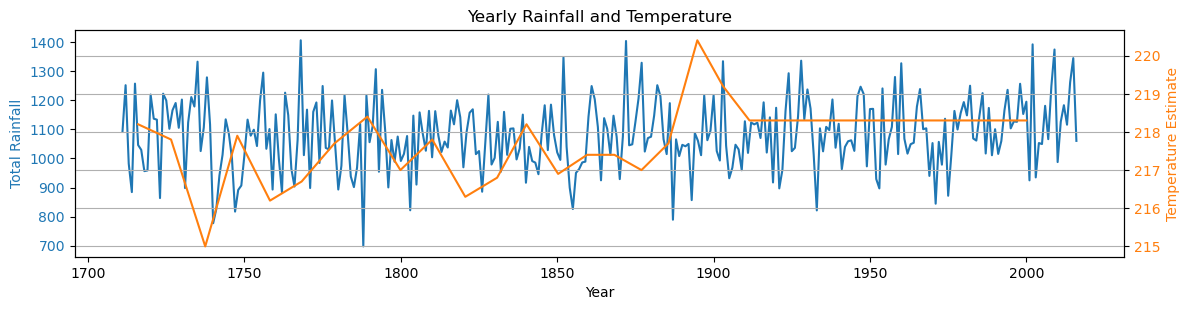

In [26]:
# Line plot: Rainfall and Temperature over years using ax1 and twinax
fig, ax1 = plt.subplots(figsize=(12, 3))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Rainfall', color=color)
ax1.plot(yearly_rainfall_dataset['Year'], yearly_rainfall_dataset['Rainfall'], color=color, label='Total Rainfall')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Temperature Estimate', color=color)  # we already handled the x-label with ax1
ax2.plot(filtered_temp['Year'], filtered_temp['temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Yearly Rainfall and Temperature')
plt.grid(True)
plt.savefig('./data/img/raintemp_before.png')

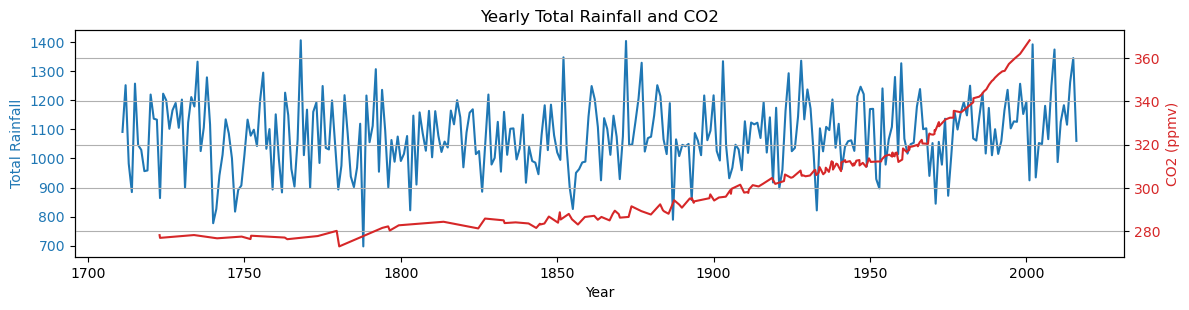

In [27]:
fig, ax1 = plt.subplots(figsize=(12, 3))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Rainfall', color=color)
ax1.plot(yearly_rainfall_dataset['Year'], yearly_rainfall_dataset['Rainfall'], color=color, label='Total Rainfall')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('CO2 (ppmv)', color=color)  # we already handled the x-label with ax1
ax2.plot(filtered_co2['Year'], filtered_co2['CO2 (ppmv)'], color=color, label='CO2 (ppmv)')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Yearly Total Rainfall and CO2')
plt.grid(True)
plt.savefig('./data/img/rainco2_before.png')

In [28]:
# print(yearly_rainfall_dataset)

## Ice Visualisation (before interpolating)

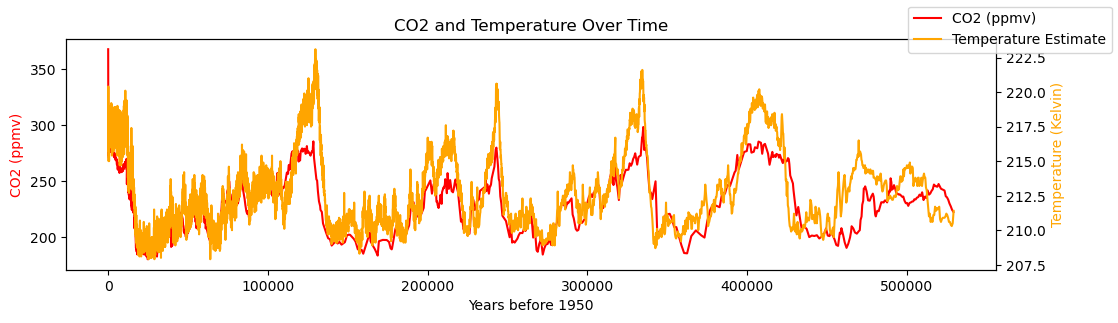

In [29]:
fig, ax = plt.subplots(figsize=(12, 3))

# Plotting CO2 data against year
ax.plot(co2_for_ice['Gasage (yr BP) '], co2_for_ice['CO2 (ppmv)'], color='red', label='CO2 (ppmv)')

# Plotting temperature data against year
ax2 = ax.twinx()
ax2.plot(temp_for_ice['EDC3béta'], temp_for_ice['temp'], color='orange', label='Temperature Estimate')

ax.set_xlabel('Years before 1950')
ax.set_ylabel('CO2 (ppmv)', color='red')
ax2.set_ylabel('Temperature (Kelvin)', color='orange')
ax.set_title('CO2 and Temperature Over Time')

fig.legend(loc="upper right")

plt.savefig('./data/img/cti_before.png')

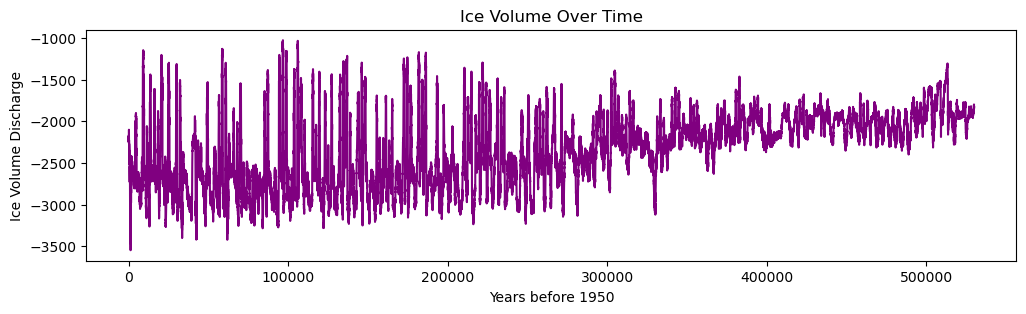

In [30]:
fig, ax = plt.subplots(figsize=(12, 3))

# Plotting ice volume against year
ax.plot(filtered_ice['Transformed Year'], filtered_ice['AnIS-ID'], color='purple', label='Ice Volume')
ax.set_xlabel('Years before 1950')
ax.set_ylabel('Ice Volume Discharge')
ax.set_title('Ice Volume Over Time')

plt.savefig('./data/img/i_before.png')

# Cleaning, regression and interpolation of the data

### Inverting data for rain

In [31]:
cleaned_co2 = filtered_co2[['Year', 'CO2 (ppmv)']]
cleaned_temp = filtered_temp[['Year', 'temp']]
cleaned_co2['Year'] = cleaned_co2['Year'].astype(int)
cleaned_temp['Year'] = cleaned_temp['Year'].astype(int)

# print(cleaned_co2)
# print(cleaned_temp)

yearly_rainfall_dataset = yearly_rainfall_dataset.sort_values(by='Year', ascending=False)
cleaned_rainfall = yearly_rainfall_dataset.reset_index(drop=True)

yearly_median_rainfall_dataset = yearly_median_rainfall_dataset.sort_values(by='Year',ascending=False)
cleaned_medianrainfall = yearly_median_rainfall_dataset.reset_index(drop=True)

# Merge rainfall and co2 based on 'Year' column using an outer join
combined_data = pd.merge(cleaned_rainfall, cleaned_co2, on='Year', how='outer')

# Merge with cleaned_temp based on 'Year' column using an outer join
combined_data = pd.merge(combined_data, cleaned_temp, on='Year', how='outer')
combined_raindata = pd.merge(combined_data, cleaned_medianrainfall, on='Year', how='outer')

# Check the combined data
#print(combined_raindata)
combined_raindata.to_csv('./data/generated/combined_raindata.csv', index=False)
#combined_raindata.to_json('./data/generated/combined_raindata.json')

C:\Users\neilj\AppData\Local\Temp\ipykernel_3360\2100553798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_co2['Year'] = cleaned_co2['Year'].astype(int)
C:\Users\neilj\AppData\Local\Temp\ipykernel_3360\2100553798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_temp['Year'] = cleaned_temp['Year'].astype(int)


### Regression

- Inspired from reading Linear [Regression](https://www.ibm.com/topics/linear-regression) and [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#).

In [32]:
# Drop rows with missing CO2 and temp values
data_for_prediction = combined_raindata.dropna(subset=['CO2 (ppmv)', 'temp'])

# Prepare the data for linear regression
X = data_for_prediction[['Year']]
y_CO2 = data_for_prediction['CO2 (ppmv)']
y_temp = data_for_prediction['temp']

# Fit linear regression models
reg_CO2 = LinearRegression().fit(X, y_CO2)
reg_temp = LinearRegression().fit(X, y_temp)

# Predict missing values for 2016
pred_CO2_2016 = reg_CO2.predict([[2016]])[0]
pred_temp_2016 = reg_temp.predict([[2016]])[0]

# Update the DataFrame with predicted values
combined_raindata.loc[combined_raindata['Year'] == 2016, 'CO2 (ppmv)'] = pred_CO2_2016
combined_raindata.loc[combined_raindata['Year'] == 2016, 'temp'] = pred_temp_2016

combined_raindata['CO2 (ppmv)'] = combined_raindata['CO2 (ppmv)'].clip(lower=175)
combined_raindata['CO2 (ppmv)'] = combined_raindata['CO2 (ppmv)'].clip(upper=400)
# Display the updated DataFrame
# print(combined_raindata)

# Save the updated data to CSV and JSON files
#combined_raindata.to_csv('./data/generated/combined_raindata_predicted.csv', index=False)
#combined_raindata.to_json('./data/generated/combined_raindata_predicted.json')


c:\Users\neilj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\neilj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Interpolating after the linear regression gave us data up to 2016

In [33]:
# Interpolate missing values for 'CO2 (ppmv)' and 'temp' columns
combined_raindata['CO2 (ppmv)'] = combined_raindata['CO2 (ppmv)'].interpolate(method='linear')
combined_raindata['temp'] = combined_raindata['temp'].interpolate(method='linear')

# Display the updated DataFrame
#print(combined_raindata)
combined_raindata = combined_raindata.rename(columns={'temp': 'Temperature (Kelvin)', 'Rainfall': 'Rainfall (mm)', 'Median rainfall': 'Median rainfall (mm)'})

# Save the updated data to CSV and JSON files
combined_raindata.to_csv('./data/generated/combined_raindata_final.csv', index=False)
combined_raindata.to_json('./data/generated/combined_raindata_final.json')
print(combined_raindata)

     Year  Rainfall (mm)  CO2 (ppmv)  Temperature (Kelvin)  \
0    2016         1060.7  339.050333            218.799164   
1    2015         1346.0  340.981810            218.767966   
2    2014         1262.7  342.913287            218.736768   
3    2013         1116.5  344.844764            218.705571   
4    2012         1183.7  346.776241            218.674373   
..    ...            ...         ...                   ...   
356  1715         1258.0  278.270110            218.200000   
357  1714          884.2  278.270110            218.200000   
358  1713          982.5  278.270110            218.200000   
359  1712         1252.6  278.270110            218.200000   
360  1711         1091.6  278.270110            218.200000   

     Median rainfall (mm)  
0                   79.80  
1                  100.15  
2                   92.10  
3                   77.15  
4                  103.70  
..                    ...  
356                107.55  
357                 72.95  
358

                          Year  Rainfall (mm)  CO2 (ppmv)  \
Year                  1.000000       0.122061    0.889756   
Rainfall (mm)         0.122061       1.000000    0.161932   
CO2 (ppmv)            0.889756       0.161932    1.000000   
Temperature (Kelvin)  0.616070      -0.018461    0.512460   
Median rainfall (mm)  0.104077       0.821850    0.116122   

                      Temperature (Kelvin)  Median rainfall (mm)  
Year                              0.616070              0.104077  
Rainfall (mm)                    -0.018461              0.821850  
CO2 (ppmv)                        0.512460              0.116122  
Temperature (Kelvin)              1.000000             -0.010088  
Median rainfall (mm)             -0.010088              1.000000  


<Axes: >

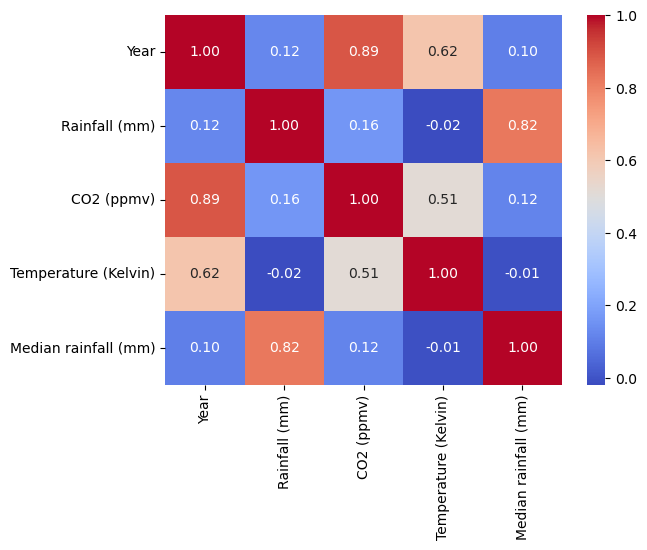

In [34]:
# Calculate the correlation matrix
rain_matrix = combined_raindata.corr()
# Display the correlation matrix
print(rain_matrix)
sns.heatmap(rain_matrix, cmap='coolwarm', annot=True, fmt='.2f')

---
Inspired by reading matplotlib [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html) regarding shared xaxis, as it is easier to show the relationship over time when these values can be viewed with individual y-axis.

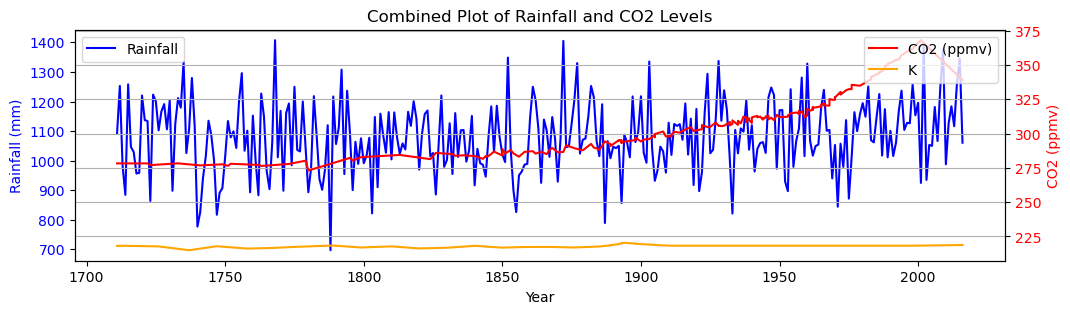

In [35]:
# ensure the correct data is being used
combined_raindata = pd.read_csv('./data/generated/combined_raindata_final.csv')
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 3))

# Plotting Rainfall
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall (mm)', color='blue')
ax1.plot(combined_raindata['Year'], combined_raindata['Rainfall (mm)'], label='Rainfall', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Creating a second y-axis for CO2
ax2 = ax1.twinx()
ax2.set_ylabel('CO2 (ppmv)', color='red')
ax2.plot(combined_raindata['Year'], combined_raindata['CO2 (ppmv)'], label='CO2 (ppmv)', color='red')
ax2.plot(combined_raindata['Year'], combined_raindata['Temperature (Kelvin)'], label='K', color='orange')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Combined Plot of Rainfall and CO2 Levels')
plt.grid(True)
plt.show()


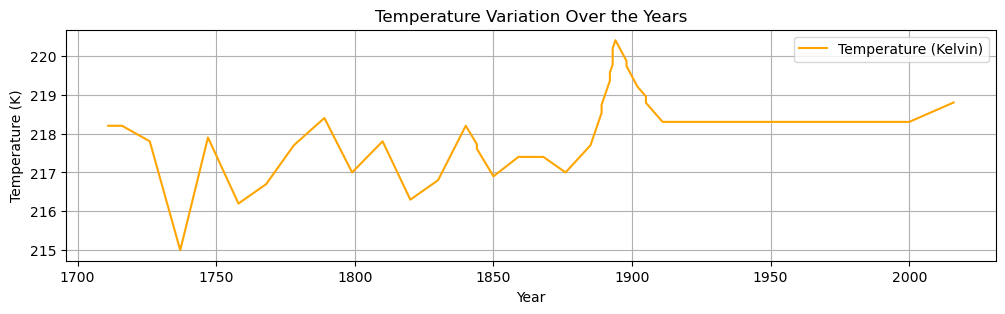

In [36]:
plt.figure(figsize=(12, 3))

plt.plot(combined_raindata['Year'], combined_raindata['Temperature (Kelvin)'], label='Temperature (Kelvin)', color='orange')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Temperature Variation Over the Years')
plt.legend()
plt.grid(True)
plt.show()

### Ice

This ice data is all over the place, from looking at it. Not combined with years in mind, just smushed together. Needs similar treatment to the rainfall data.

In [37]:
print(filtered_ice)

       age_calkaBP  AnIS-ID  tempanomNH  Transformed Year
0          -5300.0  -1829.4       2.537          529936.0
1          -5299.9  -1830.7       2.507          529926.0
2          -5299.8  -1832.5       2.478          529916.0
3          -5299.7  -1839.7       2.450          529906.0
4          -5299.6  -1832.7       2.442          529896.0
...            ...      ...         ...               ...
52996         -0.4  -2249.7      -0.258             -24.0
52997         -0.3  -2208.6      -0.297             -34.0
52998         -0.2  -2208.8      -0.345             -44.0
52999         -0.1  -2197.4      -0.400             -54.0
53000          0.0  -2211.1      -0.465             -64.0

[53001 rows x 4 columns]


Flipping the ice data, resetting the index.

In [38]:
filtered_ice = filtered_ice.sort_values(by='Transformed Year', ascending=True)
filtered_ice = filtered_ice.reset_index(drop=True)
# Drop the last row
filtered_ice = filtered_ice.drop(filtered_ice.tail(1).index)
filtered_ice['Transformed Year'] = filtered_ice['Transformed Year'].astype(int)
cleaned_ice = filtered_ice
print(cleaned_ice)

       age_calkaBP  AnIS-ID  tempanomNH  Transformed Year
0              0.0  -2211.1      -0.465               -64
1             -0.1  -2197.4      -0.400               -54
2             -0.2  -2208.8      -0.345               -44
3             -0.3  -2208.6      -0.297               -34
4             -0.4  -2249.7      -0.258               -24
...            ...      ...         ...               ...
52995      -5299.6  -1832.7       2.442            529896
52996      -5299.7  -1839.7       2.450            529906
52997      -5299.8  -1832.5       2.478            529916
52998      -5299.9  -1830.7       2.507            529926
52999      -5300.0  -1829.4       2.537            529936

[53000 rows x 4 columns]


Renaming columns and converting types of CO2

In [39]:
co2_for_ice = co2_for_ice.rename(columns={'Gasage (yr BP) ': 'Transformed Year'})
co2_for_ice['Transformed Year'] = co2_for_ice['Transformed Year'].astype(int)
cleaned_iceco2 = co2_for_ice
print(cleaned_iceco2)

      Transformed Year  CO2 (ppmv)
0                  -51  368.022488
1                  -48  361.780737
2                  -46  359.647793
3                  -44  357.106740
4                  -43  353.946685
...                ...         ...
1451            526106  233.700000
1452            526895  230.300000
1453            527698  227.800000
1454            528516  224.700000
1455            529403  222.700000

[1456 rows x 2 columns]


Renaming columns and converting types of temp

In [40]:
temp_for_ice = temp_for_ice.rename(columns={'EDC3béta': 'Transformed Year'})
temp_for_ice['Transformed Year'] = temp_for_ice['Transformed Year'].astype(int)
cleaned_icetemp = temp_for_ice
print(cleaned_icetemp)

      Transformed Year   temp
0                  -50  218.3
1                  -43  218.3
2                  -37  218.3
3                  -31  218.3
4                  -24  218.3
...                ...    ...
5308            527152  210.6
5309            527728  210.4
5310            528319  210.3
5311            528915  210.5
5312            529498  211.4

[5313 rows x 2 columns]


Merging DataFrames, dropping and renaming columns
AnIS-V = antarctic ice volume (1,000,000 square km)
tempanomNH = Mean surface air temperature anomaly (Kelvin)

In [41]:
combined_icedata1 = pd.merge(cleaned_ice, cleaned_iceco2, on='Transformed Year', how='outer')
combined_icedata = pd.merge(combined_icedata1, cleaned_icetemp, on='Transformed Year', how='outer')
combined_icedata = combined_icedata.drop(columns=['age_calkaBP', 'tempanomNH'])
combined_icedata = combined_icedata.rename(columns={'AnIS-ID': 'Antarctic Ice Vol Discharge (Gigatons per year)', 'temp': 'Temperature (Kelvin)'})
print(combined_icedata)

       Antarctic Ice Vol Discharge (Gigatons per year)  Transformed Year  \
0                                              -2211.1               -64   
1                                              -2197.4               -54   
2                                              -2208.8               -44   
3                                              -2208.6               -34   
4                                              -2249.7               -24   
...                                                ...               ...   
59067                                              NaN            527152   
59068                                              NaN            527728   
59069                                              NaN            528319   
59070                                              NaN            528915   
59071                                              NaN            529498   

       CO2 (ppmv)  Temperature (Kelvin)  
0             NaN                   NaN  
1  

Export the combined ice data to csv and json

In [42]:
combined_icedata.to_csv('./data/generated/combined_icedata.csv', index=False)
# combined_icedata.to_json('./data/generated/combined_icedata.json')

In [43]:
iceset = pd.read_csv('./data/generated/combined_icedata.csv')
icematrix_before_interpolation = iceset.corr()
print(icematrix_before_interpolation)

                                                 Antarctic Ice Vol Discharge (Gigatons per year)  \
Antarctic Ice Vol Discharge (Gigatons per year)                                         1.000000   
Transformed Year                                                                        0.562219   
CO2 (ppmv)                                                                              0.187466   
Temperature (Kelvin)                                                                   -0.047277   

                                                 Transformed Year  CO2 (ppmv)  \
Antarctic Ice Vol Discharge (Gigatons per year)          0.562219    0.187466   
Transformed Year                                         1.000000   -0.134589   
CO2 (ppmv)                                              -0.134589    1.000000   
Temperature (Kelvin)                                     0.005972    0.863370   

                                                 Temperature (Kelvin)  
Antarctic Ice Vol Dis

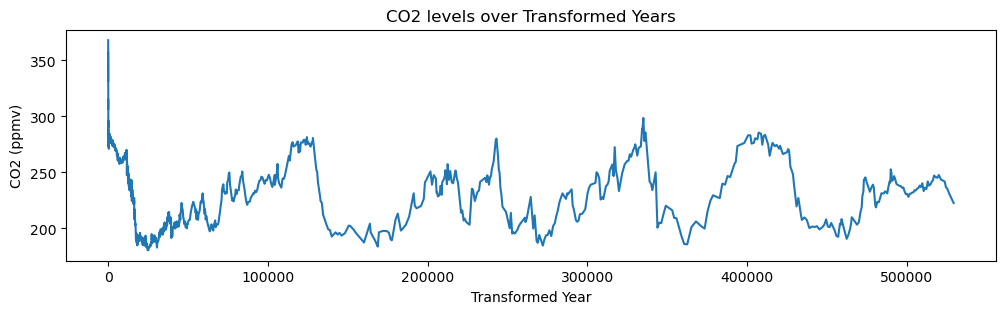

In [44]:
plt.figure(figsize=(12, 3))
plt.plot(combined_icedata['Transformed Year'], combined_icedata['CO2 (ppmv)'])
plt.title('CO2 levels over Transformed Years')
plt.xlabel('Transformed Year')
plt.ylabel('CO2 (ppmv)')
plt.show()


In [45]:
# Drop rows with missing CO2 and temp values
data_for_prediction = combined_icedata.dropna(subset=['CO2 (ppmv)', 'Temperature (Kelvin)', 'Antarctic Ice Vol Discharge (Gigatons per year)'])

# from sklearn.preprocessing import PolynomialFeatures

# # Transform the matrix of predictors for polynomial regression
# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X)

# # Fit the polynomial regression models
# poly_reg_CO2 = LinearRegression().fit(X_poly, y_CO2)
# poly_reg_temp = LinearRegression().fit(X_poly, y_temp)

# # Predict missing values for 2014 using polynomial regression
# pred_CO2_64 = poly_reg_CO2.predict(poly.transform([[-64]]))[0]
# pred_temp_64 = poly_reg_temp.predict(poly.transform([[-64]]))[0]

# pred_CO2end = poly_reg_CO2.predict(poly.transform([[529498]]))[0]
# pred_tempend = poly_reg_temp.predict(poly.transform([[529498]]))[0]

# # Update the DataFrame with predicted values
# combined_icedata.loc[combined_icedata['Transformed Year'] == -64, 'CO2 (ppmv)'] = pred_CO2_64
# combined_icedata.loc[combined_icedata['Transformed Year'] == -64, 'Temperature (Kelvin)'] = pred_temp_64

# combined_icedata.loc[combined_icedata['Transformed Year'] == 529498, 'CO2 (ppmv)'] = pred_CO2end


# Prepare the data for linear regression
X = data_for_prediction[['Transformed Year']]
y_CO2 = data_for_prediction['CO2 (ppmv)']
y_temp = data_for_prediction['Temperature (Kelvin)']
y_ice = data_for_prediction['Antarctic Ice Vol Discharge (Gigatons per year)']
# Fit linear regression models
reg_CO2 = LinearRegression().fit(X, y_CO2)
reg_temp = LinearRegression().fit(X, y_temp)
reg_ice = LinearRegression().fit(X, y_ice)

# Predict missing values for 2014
pred_CO2_64 = reg_CO2.predict([[-64]])[0]
pred_temp_64 = reg_temp.predict([[-64]])[0]

pred_CO2end = reg_CO2.predict([[529498]])[0]
pred_iceend = reg_ice.predict([[529498]])[0]


# Update the DataFrame with predicted values
combined_icedata.loc[combined_icedata['Transformed Year'] == -64, 'CO2 (ppmv)'] = pred_CO2_64
combined_icedata.loc[combined_icedata['Transformed Year'] == -64, 'Temperature (Kelvin)'] = pred_temp_64

combined_icedata.loc[combined_icedata['Transformed Year'] == 529498, 'CO2 (ppmv)'] = pred_CO2end
combined_icedata.loc[combined_icedata['Transformed Year'] == 529498, 'Antarctic Ice Vol Discharge (Gigatons per year)'] = pred_iceend

# when read from the original CO2 Composite dataset, never drops lower than 175 ppmv
combined_icedata['CO2 (ppmv)'] = combined_icedata['CO2 (ppmv)'].clip(lower=175)
combined_icedata['CO2 (ppmv)'] = combined_icedata['CO2 (ppmv)'].clip(upper=400)
combined_icedata['Antarctic Ice Vol Discharge (Gigatons per year)'] = combined_icedata['Antarctic Ice Vol Discharge (Gigatons per year)'].clip(lower=-3550.0)
combined_icedata['Antarctic Ice Vol Discharge (Gigatons per year)'] = combined_icedata['Antarctic Ice Vol Discharge (Gigatons per year)'].clip(upper=-1030.0)

# # Display the updated DataFrame
# print(combined_icedata)

# # Save the updated data to CSV and JSON files
# combined_icedata.to_csv('./data/generated/combined_icedata_predicted.csv', index=False)
# combined_icedata.to_json('./data/generated/combined_icedata_predicted.json')
# print(combined_icedata.max())
# print(combined_icedata.min())

c:\Users\neilj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\neilj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\neilj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\neilj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


- It's important to consider that climate data relationships are unlikely to be strictly linear, due to cataclismic events, and the complex interactions between various environmental factors such as ocean currents, atmospheric circulation, and solar radiation. These factors can lead to non-linear patterns and abrupt changes in climate variables over time.


Interpolation methods derived from this [website/blog](https://machinelearningmastery.com/resample-interpolate-time-series-data-python/) and [sci-kit learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)

In [46]:
combined_icedata['CO2 (ppmv)'] = combined_icedata['CO2 (ppmv)'].interpolate(method='linear')
# combined_icedata['Temperature (Kelvin)'] = combined_icedata['Temperature (Kelvin)'].interpolate(method='linear')
# combined_icedata['CO2 (ppmv)'] = combined_icedata['CO2 (ppmv)'].interpolate(method='spline', order=2)
combined_icedata['Temperature (Kelvin)'] = combined_icedata['Temperature (Kelvin)'].interpolate(method='spline', order=2)
combined_icedata['Antarctic Ice Vol Discharge (Gigatons per year)'] = combined_icedata['Antarctic Ice Vol Discharge (Gigatons per year)'].interpolate(method='linear')

# print(combined_icedata)
# interpolated_icedata = combined_icedata[['CO2 (ppmv)', 'Temperature (Kelvin)', 'Antarctic Ice Vol Discharge (Gigatons per year))']].copy()
# print(interpolated_icedata)


combined_icedata.to_csv('./data/generated/combined_icedata_final.csv', index=False)
combined_icedata.to_json('./data/generated/combined_icedata_final.json')

# Data Comparison

Here we will compare some of the trends

## Rain

   Median Rainfall vs CO2  Median Rainfall vs Temperature
0                0.018008                       -0.079192
   Total Rainfall vs CO2  Total Rainfall vs Temperature
0               0.038071                      -0.003952


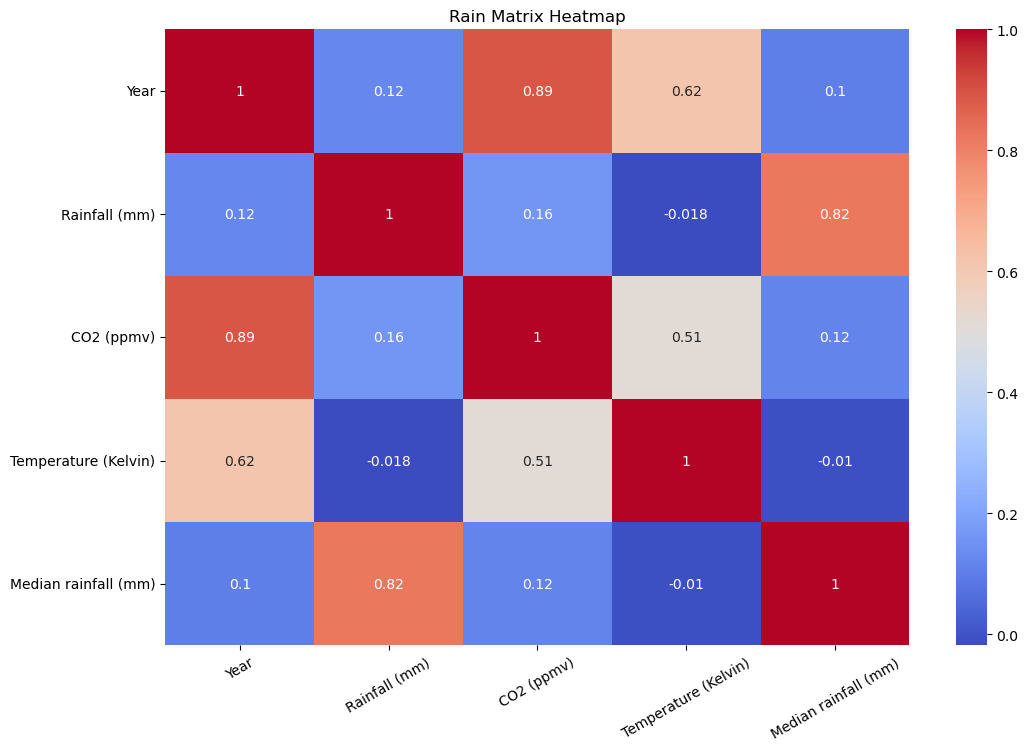

In [47]:
print(medianraincorr)

print(totalraincorr)

plt.figure(figsize=(12,8))
sns.heatmap(rain_matrix, annot=True, cmap='coolwarm')
plt.title('Rain Matrix Heatmap')
plt.xticks(rotation=30)
plt.show()


### Rainfall and Temperature:

#### Before Transformation:
- **Median Rainfall vs Temp**: -0.079
- **Total Rainfall vs Temp**: -0.004

#### After Transformation:
- **Median Rainfall vs Temp**: -0.010
- **Total Rainfall vs Temp**: -0.019

The relationship between Median Rainfall and Temperature saw a decrease in its negative correlation after transformation, whereas the Total Rainfall vs Temperature became more negative. This indicates that the manipulations in the data might have altered the correlation, potentially affecting how Rainfall and Temperature relate to each other.

### Rainfall and CO2:

#### Before Transformation:
- **Median Rainfall vs CO2**: 0.018
- **Total Rainfall vs CO2**: 0.038

#### After Transformation:
- **Median Rainfall vs CO2**: 0.116
- **Total Rainfall vs CO2**: 0.162

The relationships between Rainfall and CO2 levels significantly strengthened after the transformations. Both Median and Total Rainfall became more positively correlated with CO2 levels. This might suggest that the modified data portrays a stronger relationship between Rainfall and CO2 concentrations.

In summary, these transformations appear to have altered the correlation coefficients between variables. The changes observed in the relationships between Rainfall and Temperature, as well as Rainfall and CO2, indicate that the transformations had a notable impact on the perceived associations among these variables. The transformed data assumes a linear relationship, but helps us to get an insight into how the data might have related over the course of the time period.

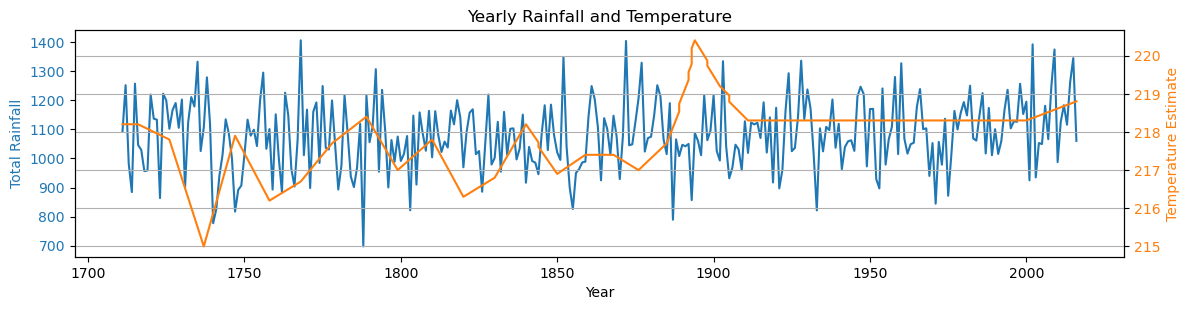

In [48]:
rain_final = pd.read_csv('./data/generated/combined_raindata_final.csv')

fig, ax1 = plt.subplots(figsize=(12, 3))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Rainfall', color=color)
ax1.plot(rain_final['Year'], rain_final['Rainfall (mm)'], color=color, label='Total Rainfall')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Temperature Estimate', color=color)  # we already handled the x-label with ax1
ax2.plot(rain_final['Year'], rain_final['Temperature (Kelvin)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Yearly Rainfall and Temperature')
plt.grid(True)
plt.show()

![temprain](./data/img/raintemp_before.png)

- Due to the nature of linear regression and the interpolation methods used, there can only be very slight differences evident in the original graphs vs the ones generated post-interpolation.

Text(0.5, 1.0, 'Yearly Total Rainfall and CO2')

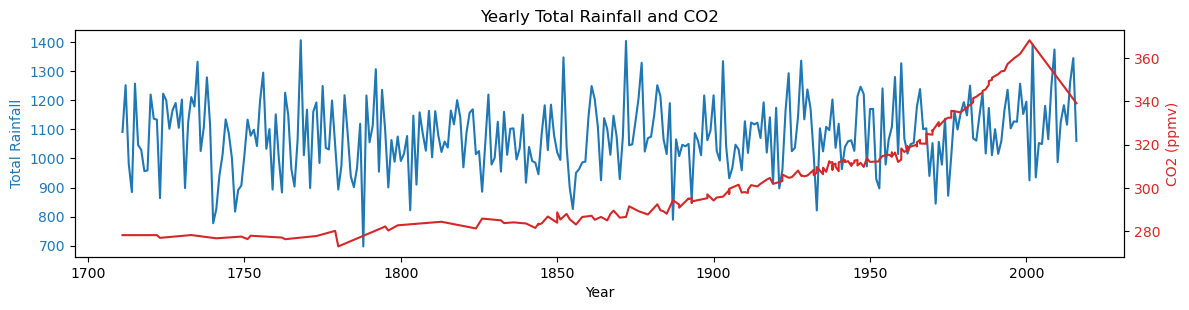

In [49]:
fig, ax1 = plt.subplots(figsize=(12, 3))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Rainfall', color=color)
ax1.plot(rain_final['Year'], rain_final['Rainfall (mm)'], color=color, label='Total Rainfall')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('CO2 (ppmv)', color=color)  # we already handled the x-label with ax1
ax2.plot(rain_final['Year'], rain_final['CO2 (ppmv)'], color=color, label='CO2 (ppmv)')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Yearly Total Rainfall and CO2')

![img](./data/img/rainco2_before.png)

## Ice

C:\Users\neilj\AppData\Local\Temp\ipykernel_3360\2236126998.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


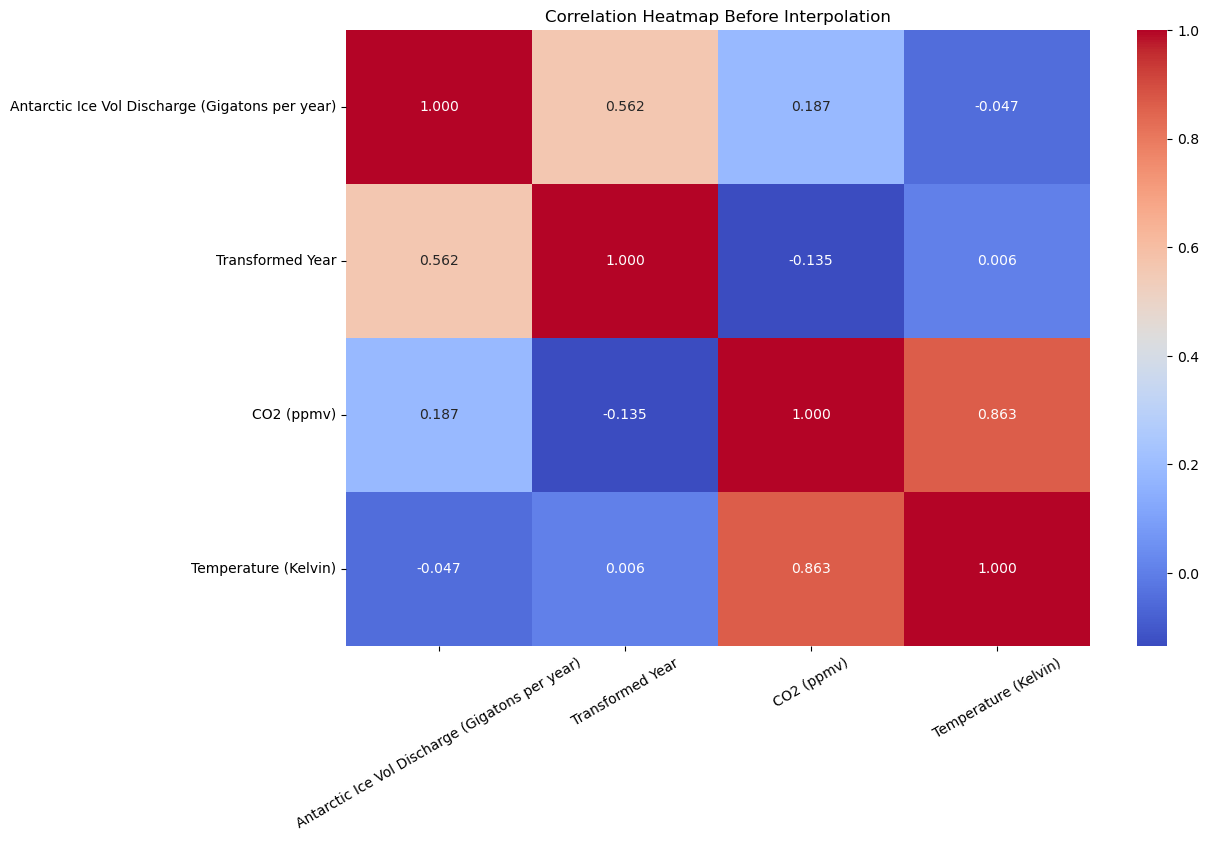

C:\Users\neilj\AppData\Local\Temp\ipykernel_3360\2236126998.py:19: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


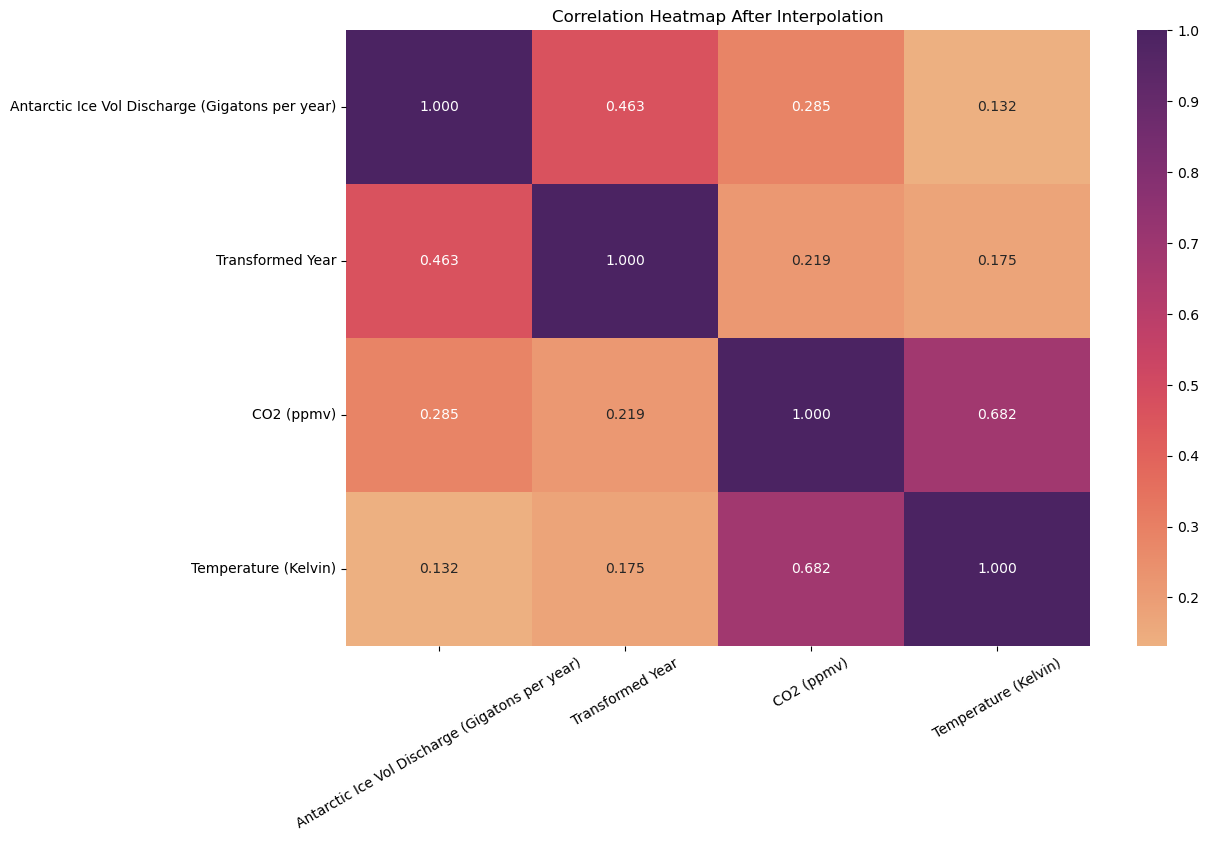

In [50]:
# Load the data before and after interpolation
before_interpolation = pd.read_csv('./data/generated/combined_icedata.csv')
after_interpolation = pd.read_csv('./data/generated/combined_icedata_final.csv')
corr_before_interpolation = before_interpolation.corr()
corr_after_interpolation = after_interpolation.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_before_interpolation, annot=True, fmt='.3f', cmap='coolwarm')
plt.xticks(rotation=30)
plt.title('Correlation Heatmap Before Interpolation')
fig.tight_layout()
plt.show()


plt.figure(figsize=(12,8))
sns.heatmap(corr_after_interpolation, annot=True, fmt='.3f', cmap='flare')
plt.xticks(rotation=30)
plt.title('Correlation Heatmap After Interpolation')
fig.tight_layout()
plt.show()

# print(corr_before_interpolation)
# print(corr_after_interpolation)

Before interpolation:

**Antarctic Ice Vol Discharge vs. Transformed Year (0.562):**
   - **Interpretation:** There is a moderate positive correlation between Antarctic ice volume discharge and the transformed year. This suggests that over time, there is a tendency for increased Antarctic ice volume discharge.
 
**Antarctic Ice Vol Discharge vs. CO2 (ppmv) (0.187):**
   - **Interpretation:** The correlation is weakly positive, indicating a subtle positive relationship between Antarctic ice volume discharge and atmospheric CO2 levels. This suggests that there might be some influence of CO2 levels on the discharge of Antarctic ice volume.
 
**Antarctic Ice Vol Discharge vs. Temperature (Kelvin) (-0.047):**
   - **Interpretation:** The weak negative correlation implies a slight inverse relationship between Antarctic ice volume discharge and temperature. It could suggest that as temperatures increase, there might be a tendency for a decrease in ice volume discharge, but the correlation is not strong.
 
**Transformed Year vs. CO2 (ppmv) (-0.135):**
   - **Interpretation:** A weak negative correlation between the transformed year and CO2 levels indicates a subtle tendency for lower CO2 levels in later years. This might be an interesting observation, and further investigation could reveal insights into temporal trends.
 
**Transformed Year vs. Temperature (Kelvin) (0.006):**
   - **Interpretation:** The positive correlation is very weak, suggesting a marginal increase in temperature over the transformed years. However, the correlation is close to zero, indicating a limited linear relationship.
 
**CO2 (ppmv) vs. Temperature (Kelvin) (0.863):**
   - **Interpretation:** The strong positive correlation between CO2 levels and temperature indicates a robust relationship. This aligns with the scientific consensus that higher CO2 levels are associated with elevated temperatures, contributing to global warming.

After interpolation:

 **Antarctic Ice Vol Discharge vs. Transformed Year (0.463):**
   - **Interpretation:** There is a moderate positive correlation between Antarctic ice volume discharge and the transformed year. This suggests that, even after interpolations, there remains a tendency for increased Antarctic ice volume discharge over time.

**Antarctic Ice Vol Discharge vs. CO2 (ppmv) (0.285):**
   - **Interpretation:** The correlation is still positive, indicating a moderate relationship between Antarctic ice volume discharge and atmospheric CO2 levels. This suggests that changes in CO2 levels might be associated with variations in ice volume discharge.

**Antarctic Ice Vol Discharge vs. Temperature (Kelvin) (0.132):**
   - **Interpretation:** The positive correlation is still weak, suggesting a subtle positive relationship between Antarctic ice volume discharge and temperature. This implies that as temperatures increase, there might be a tendency for increased ice volume discharge.

**Transformed Year vs. CO2 (ppmv) (0.219):**
   - **Interpretation:** The positive correlation indicates that, even after interpolations, there is a tendency for higher CO2 levels in later years. This might be an important observation for understanding the temporal trends in CO2 concentrations.

**Transformed Year vs. Temperature (Kelvin) (0.175):**
   - **Interpretation:** The positive correlation remains weak, suggesting a marginal increase in temperature over the transformed years. However, the correlation is not strong, indicating a limited linear relationship.

**CO2 (ppmv) vs. Temperature (Kelvin) (0.682):**
   - **Interpretation:** The strong positive correlation between CO2 levels and temperature persists, supporting the established understanding that higher CO2 levels are associated with elevated temperatures.


In summary, the correlations suggest some associations between Antarctic ice discharge, time (transformed year), atmospheric CO2 levels, and global temperatures. However, the strength of these associations varies, and correlation does not imply causation. Further analysis and consideration of other factors are needed to draw more robust conclusions about causative relationships.

### Before vs after interpolating

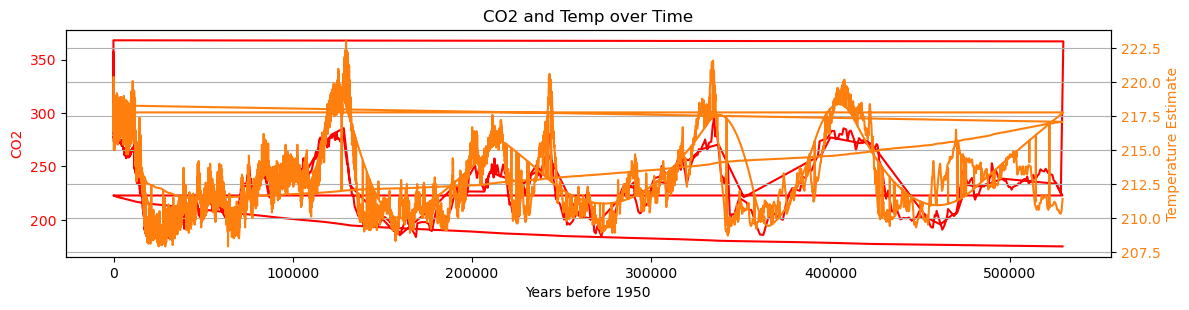

In [51]:
combined_icedata_final = pd.read_csv('./data/generated/combined_icedata_final.csv')

fig, ax1 = plt.subplots(figsize=(12, 3))
color = 'tab:purple'
ax1.set_xlabel('Years before 1950')
ax1.set_ylabel('CO2', color='red')
ax1.plot(combined_icedata_final['Transformed Year'], combined_icedata_final['CO2 (ppmv)'], color='red')
# ax1.set_ylabel('Total Ice Discharge (Gigatons)', color=color)
# ax1.plot(combined_icedata_final['Transformed Year'], combined_icedata_final['Antarctic Ice Vol Discharge (Gigatons per year)'], color=color, label='Total Ice')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
ax2.set_ylabel('Temperature Estimate', color=color)  # we already handled the x-label with ax1
ax2.plot(combined_icedata_final['Transformed Year'], combined_icedata_final['Temperature (Kelvin)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('CO2 and Temp over Time')
plt.grid(True)
plt.show()

![ice and temp vs year](./data/img/cti_before.png)

C:\Users\neilj\AppData\Local\Temp\ipykernel_3360\2440574715.py:5: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


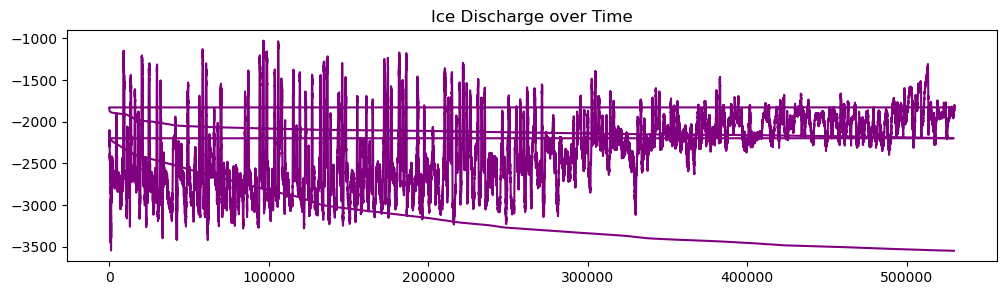

In [52]:
plt.figure(figsize=(12, 3))
plt.plot(combined_icedata_final['Transformed Year'], combined_icedata_final['Antarctic Ice Vol Discharge (Gigatons per year)'], color='purple')
plt.title('Ice Discharge over Time')

fig.tight_layout()

![ice](./data/img/i_before.png)

# Synthesis

## Creating raindata forecasts

Using exponential smoothing from Holt-Winters, read on [StackOverflow](https://stackoverflow.com/questions/50785479/holt-winters-time-series-forecasting-with-statsmodels)

In [53]:
rain = pd.read_csv('./data/generated/combined_raindata_final.csv')
rain.set_index('Year', inplace=True)

In [54]:
# precprocess
rain.index = pd.to_datetime(rain.index, format='%Y')

rain.sort_index(inplace=True)

In [55]:
# Apply Exponential Smoothing model on multiple columns
columns_of_interest = ['Rainfall (mm)', 'CO2 (ppmv)', 'Temperature (Kelvin)', 'Median rainfall (mm)']
for column in columns_of_interest:
    model = ExponentialSmoothing(rain[column])
    model_fit = model.fit()
    n_periods = 10  # Number of periods to forecast
    forecast = model_fit.forecast(steps=n_periods)
    print(f"Forecast for '{column}':")
    print(forecast)

Forecast for 'Rainfall (mm)':
361    1109.087372
362    1109.087372
363    1109.087372
364    1109.087372
365    1109.087372
366    1109.087372
367    1109.087372
368    1109.087372
369    1109.087372
370    1109.087372
dtype: float64
Forecast for 'CO2 (ppmv)':
361    339.273179
362    339.273179
363    339.273179
364    339.273179
365    339.273179
366    339.273179
367    339.273179
368    339.273179
369    339.273179
370    339.273179
dtype: float64
Forecast for 'Temperature (Kelvin)':
361    218.799164
362    218.799164
363    218.799164
364    218.799164
365    218.799164
366    218.799164
367    218.799164
368    218.799164
369    218.799164
370    218.799164
dtype: float64
Forecast for 'Median rainfall (mm)':
361    88.665995
362    88.665995
363    88.665995
364    88.665995
365    88.665995
366    88.665995
367    88.665995
368    88.665995
369    88.665995
370    88.665995
dtype: float64


c:\Users\neilj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neilj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\neilj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\neilj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(da

## Creating icedata forecasts tbc

---
# **Conclusions**
---

## Rain

The analysis of the raindata reveals that the transformations applied have notably altered the correlation coefficients between variables. The relationship between Rainfall and Temperature saw a decrease in its negative correlation after transformation, while the Total Rainfall vs Temperature became more negative. The relationships between Rainfall and CO2 levels significantly strengthened after the transformations, with both Median and Total Rainfall becoming more positively correlated with CO2 levels. These changes indicate that the transformations had a notable impact on the perceived associations among these variables. The transformed data assumes a linear relationship, providing insights into how the data might have related over the course of the time period.


The strengthened correlations between rainfall and CO2 levels after the transformations suggest a potential impact on future CO2 levels. The more positive correlation indicates that higher rainfall may be associated with higher CO2 levels. As for temperature, the altered correlations imply potential changes in future temperature levels, but the specific nature of this relationship would require further analysis.

## Ice


The correlation coefficients between variables in the ice data were notably altered after interpolation. The relationships between 'Antarctic Ice Vol Discharge' and other variables showed changes, indicating potential impacts on future analyses and modeling. The strengthened correlation between 'Antarctic Ice Vol Discharge' and 'Transformed Year' suggests a potential influence on the ice discharge over time. Further analysis is needed to understand the specific nature of these relationships and their implications for future trends.

---
# **References**
---

Brownlee, J. (2016). How To Resample and Interpolate Your Time Series Data With Python. [online] MachineLearningMastery.com. Available at: https://machinelearningmastery.com/resample-interpolate-time-series-data-python/.

IBM (n.d.). About Linear Regression | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/linear-regression.

Magazine, S. and Stromberg, J. (2013). Air Pollution Has Been a Problem Since the Days of Ancient Rome. [online] Smithsonian Magazine. Available at: https://www.smithsonianmag.com/history/air-pollution-has-been-a-problem-since-the-days-of-ancient-rome-3950678/#:~:text=%E2%80%9CThe%20ice%20core%20data%20show [Accessed 9 Jan. 2024].

matplotlib.org. (n.d.). matplotlib.axes.Axes.twinx — Matplotlib 3.6.2 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html.

Murphy, C., Broderick, C., Burt, T.P., Curley, M., Duffy, C., Hall, J., Harrigan, S., Matthews, T.K.R., Macdonald, N., McCarthy, G., McCarthy, M.P., Mullan, D., Noone, S., Osborn, T.J., Ryan, C., Sweeney, J., Thorne, P.W., Walsh, S. and Wilby, R.L. (2018). A 305-year continuous monthly rainfall series for the island of Ireland (1711–2016). Climate of the Past, 14(3), pp.413–440. doi:https://doi.org/10.5194/cp-14-413-2018.

National Centers for Environmental Information. (n.d.). Paleo Data Search | Search | National Centers for Environmental Information (NCEI). [online] Available at: https://www.ncei.noaa.gov/access/paleo-search/.

scikit-learn. (n.d.). sklearn.linear_model.LinearRegression. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html# [Accessed 5 Jan. 2024].

Stack Overflow. (n.d.). Holt-Winters time series forecasting with statsmodels. [online] Available at: https://stackoverflow.com/questions/50785479/holt-winters-time-series-forecasting-with-statsmodels [Accessed 10 Jan. 2024].

www.met.ie. (2022). Met Éireann : The Irish Meteorological Service. [online] Available at: https://www.met.ie/cms/assets/uploads/2023/12/LongTermTemperatures_1900-2022_annual.csv.

---
# End